In [1]:
import sys
import numpy as np 
import pandas as pd
from os.path import expanduser

# Add path to folder containing safepy

import safe

%matplotlib inline

In [2]:
sf = safe.SAFE()

In [3]:
sf.load_network(network_file='../../data/safe-data/networks/Costanzo_Science_2016.gpickle')

Loading network from ../../data/safe-data/networks/Costanzo_Science_2016.gpickle


Output path: ../../results/09_SAFE/GIN_mapping/Costanzo_Science_2016_GIN.pdf


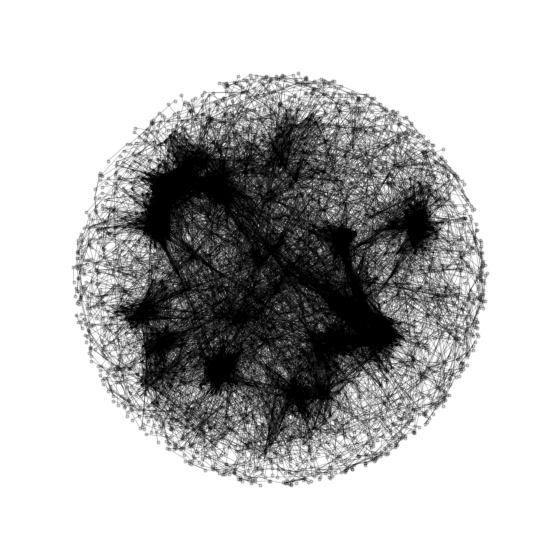

In [4]:
sf.plot_network()

In [5]:
all_piQTLs_ERG11_ORM2 = pd.read_csv('../../data/safe-data/attributes/ERG11_ORM2_Fluconazole.txt', sep='\t')

In [6]:
all_piQTLs_ERG11_ORM2

,locus_id,p-value_rMVP
0,YGL008C,8.906326e-05
1,YFR009W,7.993370e-05
2,YHR017W,6.896744e-05
3,YGL009C,5.486773e-05
4,YHL015W-A,4.602944e-05
5,YHL007C,3.260419e-05
6,YGL017W,2.439939e-05
7,YHL004W,1.728442e-05
8,YGL016W,5.257586e-06
9,YGL015C,2.256165e-06


1 -- Cell polarity & morphogenesis
2 -- Glycosylation, protein folding/targeting, cell wall biosynthesis
3 -- Ribosome biogenesis
4 -- Protein degradation/turnover
5 -- Cytokinesis
6 -- Nuclear-cytoplasmic transport
7 -- MVB sorting and pH depending signaling
8 -- mRNA & tRNA processing
9 -- tRNA wobble modification
10 -- Peroxisome
11 -- Metabolism
12 -- DNA replication & repair
13 -- Vesicle traffic
14 -- Transcription & chromatin organization
15 -- Mitosis & chromosome segregation
16 -- rDNA & ncDNA processing
17 -- Respiration, oxidative phosphorylation, mitochondrial targeting
['YHR007C', 'YLR350W']
[14, 108, 250, 719, 731, 1353, 1414, 1729, 2057, 2752, 3141]
11
Output path: ../../results/09_SAFE/GIN_mapping/ERG11:ORM2_Fluconazole_piQTLs_on_GIN_V2.pdf


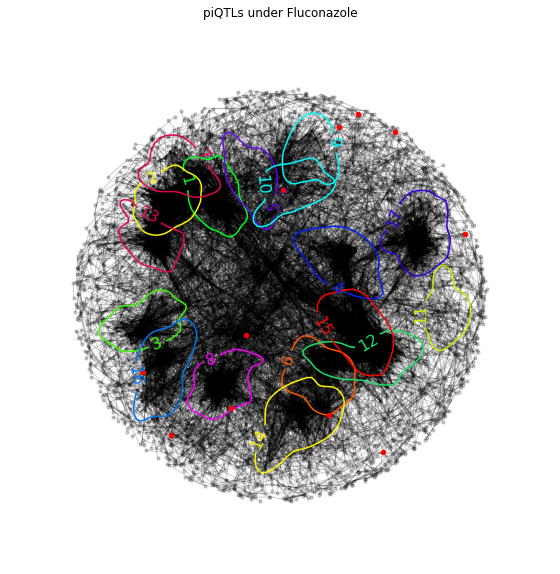

In [7]:
PPI_label ='ERG11:ORM2'
DRUG ='Fluconazole'
sf.plot_network_for_piQTLs('#ffffff', PPI_label=PPI_label, DRUG=DRUG, PPI=['YHR007C', 'YLR350W'], piQTLs=list(all_piQTLs_ERG11_ORM2['locus_id'].values), save_fig=f'../../results/09_SAFE/GIN_mapping/{PPI_label}_{DRUG}_piQTLs_on_GIN.pdf')

In [8]:
all_piQTLs_Fluconazole = pd.read_csv('../../data/safe-data/attributes/all_piQTLs_Fluconazole.txt', sep='\t')
all_piQTLs_5FC = pd.read_csv('../../data/safe-data/attributes/all_piQTLs_5.FC.txt',  sep='\t')
all_piQTLs_Metformin = pd.read_csv('../../data/safe-data/attributes/all_piQTLs_Metformin.txt',  sep='\t')
all_piQTLs_Trifluoperazine = pd.read_csv('../../data/safe-data/attributes/all_piQTLs_Trifluoperazine.txt', sep='\t')

1 -- Cell polarity & morphogenesis
2 -- Glycosylation, protein folding/targeting, cell wall biosynthesis
3 -- Ribosome biogenesis
4 -- Protein degradation/turnover
5 -- Cytokinesis
6 -- Nuclear-cytoplasmic transport
7 -- MVB sorting and pH depending signaling
8 -- mRNA & tRNA processing
9 -- tRNA wobble modification
10 -- Peroxisome
11 -- Metabolism
12 -- DNA replication & repair
13 -- Vesicle traffic
14 -- Transcription & chromatin organization
15 -- Mitosis & chromosome segregation
16 -- rDNA & ncDNA processing
17 -- Respiration, oxidative phosphorylation, mitochondrial targeting
[14, 108, 238, 250, 374, 417, 648, 677, 719, 731, 846, 1066, 1353, 1414, 1435, 1592, 1617, 1669, 1707, 1729, 1844, 1886, 1918, 1925, 2057, 2063, 2181, 2229, 2235, 2319, 2496, 2598, 2752, 2780, 2784, 2876, 2886, 3078, 3101, 3141, 3182, 3207, 3340, 3449, 3607, 3730, 3888, 3904, 3910]
49
Output path: ../../results/09_SAFE/GIN_mapping/Fluconazole_piQTLs_on_GIN_V2.pdf


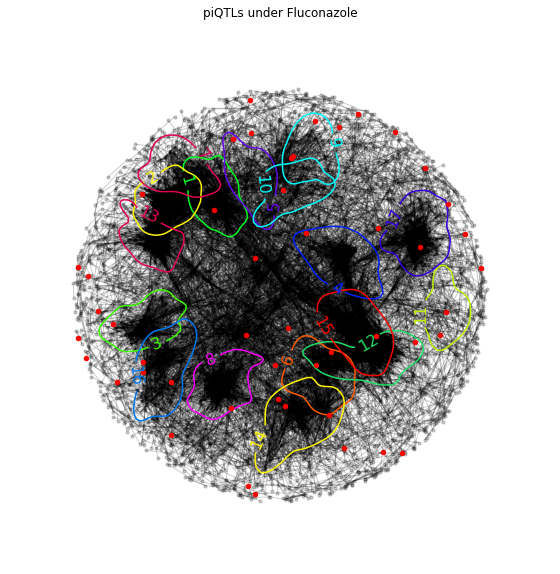

In [9]:
DRUG='Fluconazole'
sf.plot_network_for_piQTLs('#ffffff', PPI_label='', DRUG=DRUG, PPI=list(), piQTLs=list(all_piQTLs_Fluconazole['locus_id'].values), save_fig=f'../../results/09_SAFE/GIN_mapping/{DRUG}_piQTLs_on_GIN.pdf')

1 -- Cell polarity & morphogenesis
2 -- Glycosylation, protein folding/targeting, cell wall biosynthesis
3 -- Ribosome biogenesis
4 -- Protein degradation/turnover
5 -- Cytokinesis
6 -- Nuclear-cytoplasmic transport
7 -- MVB sorting and pH depending signaling
8 -- mRNA & tRNA processing
9 -- tRNA wobble modification
10 -- Peroxisome
11 -- Metabolism
12 -- DNA replication & repair
13 -- Vesicle traffic
14 -- Transcription & chromatin organization
15 -- Mitosis & chromosome segregation
16 -- rDNA & ncDNA processing
17 -- Respiration, oxidative phosphorylation, mitochondrial targeting
[132, 374, 417, 539, 677, 1122, 1592, 1669, 1709, 1888, 2181, 2774, 2802, 2942, 3027, 3030, 3482, 3798, 3802]
19
Output path: ../../results/09_SAFE/GIN_mapping/5-FC_piQTLs_on_GIN_V2.pdf


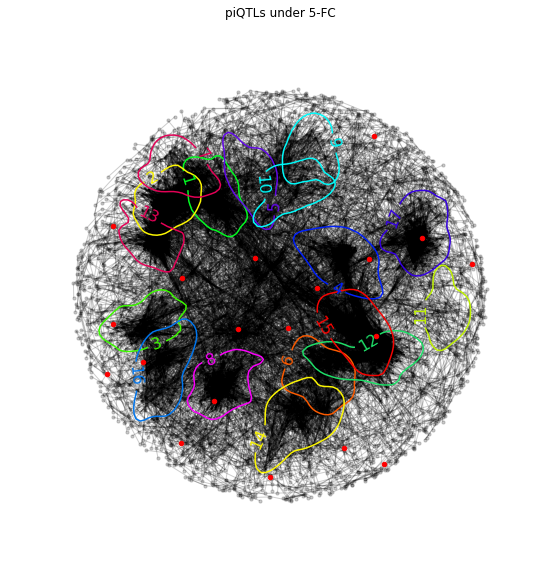

In [13]:
DRUG='5-FC'
sf.plot_network_for_piQTLs('#ffffff', PPI_label='', DRUG=DRUG, PPI=list(), piQTLs=list(all_piQTLs_5FC['locus_id'].values), save_fig=f'../../results/09_SAFE/GIN_mapping/{DRUG}_piQTLs_on_GIN.pdf')

1 -- Cell polarity & morphogenesis
2 -- Glycosylation, protein folding/targeting, cell wall biosynthesis
3 -- Ribosome biogenesis
4 -- Protein degradation/turnover
5 -- Cytokinesis
6 -- Nuclear-cytoplasmic transport
7 -- MVB sorting and pH depending signaling
8 -- mRNA & tRNA processing
9 -- tRNA wobble modification
10 -- Peroxisome
11 -- Metabolism
12 -- DNA replication & repair
13 -- Vesicle traffic
14 -- Transcription & chromatin organization
15 -- Mitosis & chromosome segregation
16 -- rDNA & ncDNA processing
17 -- Respiration, oxidative phosphorylation, mitochondrial targeting
[43, 97, 104, 176, 217, 284, 375, 417, 469, 524, 692, 846, 1122, 1290, 1435, 1548, 1669, 1867, 1918, 2111, 2155, 2187, 2211, 2212, 2294, 2432, 2546, 2596, 2609, 3030, 3106, 3233, 3296, 3502, 3532, 3544, 3801, 3802, 3821]
39
Output path: ../../results/09_SAFE/GIN_mapping/Metformin_piQTLs_on_GIN_V2.pdf


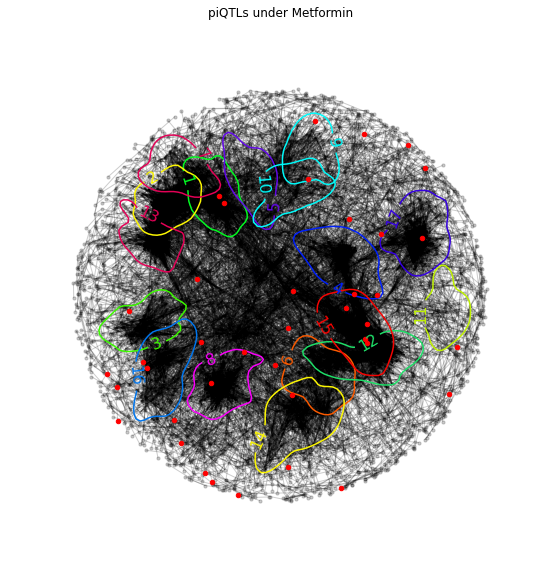

In [14]:
DRUG='Metformin'
sf.plot_network_for_piQTLs('#ffffff', PPI_label='', DRUG=DRUG, PPI=list(), piQTLs=list(all_piQTLs_Metformin['locus_id'].values), save_fig=f'../../results/09_SAFE/GIN_mapping/{DRUG}_piQTLs_on_GIN.pdf')

1 -- Cell polarity & morphogenesis
2 -- Glycosylation, protein folding/targeting, cell wall biosynthesis
3 -- Ribosome biogenesis
4 -- Protein degradation/turnover
5 -- Cytokinesis
6 -- Nuclear-cytoplasmic transport
7 -- MVB sorting and pH depending signaling
8 -- mRNA & tRNA processing
9 -- tRNA wobble modification
10 -- Peroxisome
11 -- Metabolism
12 -- DNA replication & repair
13 -- Vesicle traffic
14 -- Transcription & chromatin organization
15 -- Mitosis & chromosome segregation
16 -- rDNA & ncDNA processing
17 -- Respiration, oxidative phosphorylation, mitochondrial targeting
[417, 692, 1122, 1290, 1669, 1815, 1888, 2181, 2294, 2404, 2406, 2596, 3027, 3030, 3532, 3802]
16
Output path: ../../results/09_SAFE/GIN_mapping/Trifluoperazine_piQTLs_on_GIN_V2.pdf


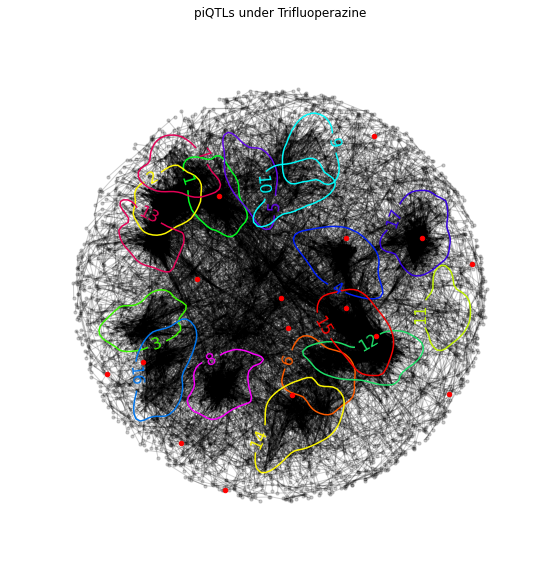

In [15]:
DRUG='Trifluoperazine'
sf.plot_network_for_piQTLs('#ffffff', PPI_label='', DRUG=DRUG, PPI=list(), piQTLs=list(all_piQTLs_Trifluoperazine['locus_id'].values), save_fig=f'../../results/09_SAFE/GIN_mapping/{DRUG}_piQTLs_on_GIN.pdf')

In [ ]:
def get_chr(x, gene_loc):
    try : 
        return gene_loc[gene_loc['Gene'] == x]['Chromosome_Name'].values[0].replace('CHR', '')
    except : 
        return np.nan

def get_locus(x, gene_loc):
    try : 
        return gene_loc[gene_loc['Gene'] == x]['Locus'].values[0]
    except:
        return np.nan

PPI_reporters = pd.read_csv('../../data/pipeline/PPI_reference_barcodes.csv')
gene_loc = pd.read_csv('../../data/genome_annotations/genes_by_strain/S288C_genes.csv')

PPI_reporters['PPI_bait'] =  [ PPI_reporters['PPI'][idx].split('_')[0] for idx in PPI_reporters.index ]
PPI_reporters['PPI_prey'] =  [ PPI_reporters['PPI'][idx].split('_')[1] for idx in PPI_reporters.index ]

PPI_reporters['CHR_bait'] = PPI_reporters['PPI_bait'].apply(get_chr, args=(gene_loc,))
PPI_reporters['CHR_prey'] = PPI_reporters['PPI_prey'].apply(get_chr, args=(gene_loc,))

PPI_reporters['Locus_bait'] = PPI_reporters['PPI_bait'].apply(get_locus, args=(gene_loc,))
PPI_reporters['Locus_prey'] = PPI_reporters['PPI_prey'].apply(get_locus, args=(gene_loc,))

In [ ]:
PPI_reporters

In [ ]:
import networkx as nx

In [ ]:
PPI_prey = np.array([ prey for prey in PPI_reporters['Locus_prey'].dropna().unique() ])

PPI_bait = np.array([ bait for bait in PPI_reporters['Locus_bait'].dropna().unique() ])

PPI_locus_reporters = []

for i in range(len(PPI_prey)):
    PPI_locus_reporters.append(PPI_prey[i])
for i in range(len(PPI_bait)):        
    PPI_locus_reporters.append(PPI_bait[i])

In [ ]:
len(set(PPI_locus_reporters))

In [ ]:
DRUG=''
sf.plot_network_for_piQTLs('#ffffff', PPI_label='', DRUG=DRUG, PPI=list(), piQTLs=set(PPI_locus_reporters), save_fig=f'../../results/GIN_mapping/PPI_reporters_on_GIN.pdf')